In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd

hitters_data = pd.read_csv("Hitters.csv")

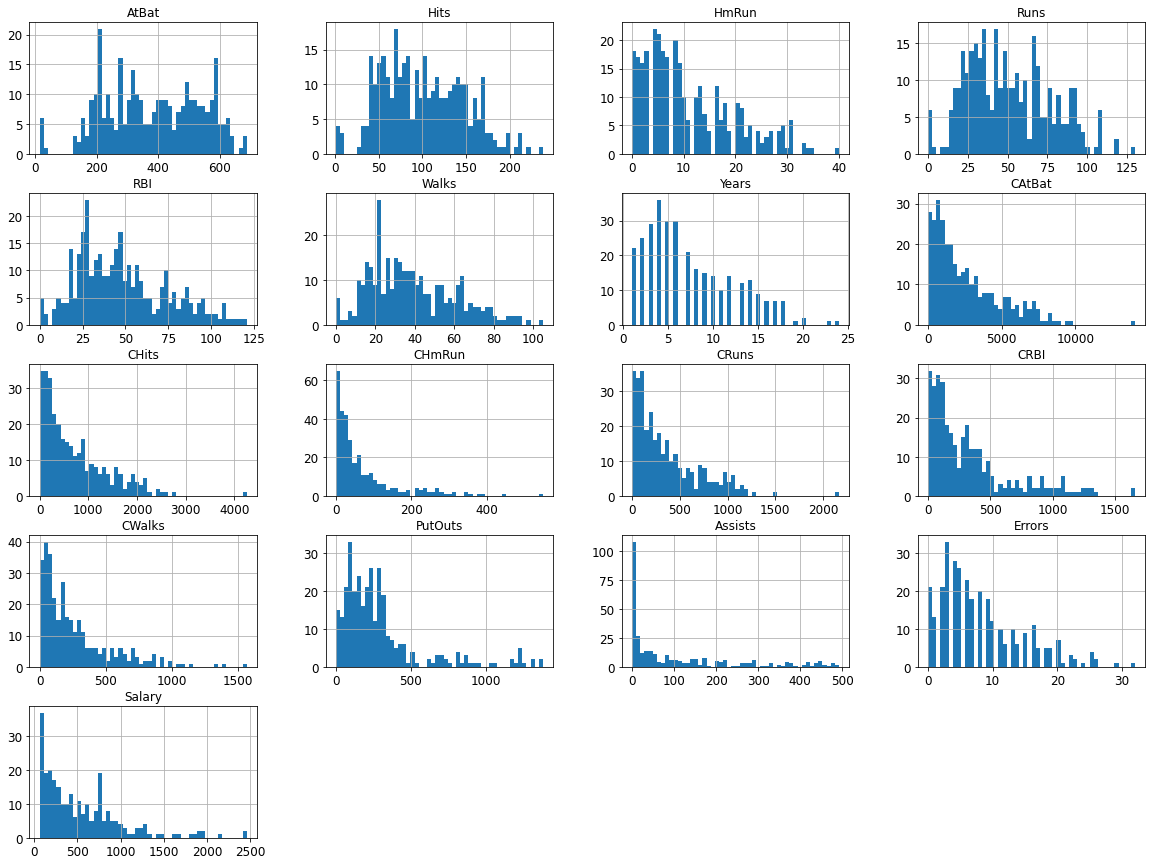

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
hitters_data.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hitters_data, test_size=0.2, random_state=42)

In [5]:
corr_matrix = hitters_data.corr()
corr_matrix["Salary"].sort_values(ascending=False)

Salary     1.000000
CRBI       0.566966
CRuns      0.562678
CHits      0.548910
CAtBat     0.526135
CHmRun     0.524931
CWalks     0.489822
RBI        0.449457
Walks      0.443867
Hits       0.438675
Runs       0.419859
Years      0.400657
AtBat      0.394771
HmRun      0.343028
PutOuts    0.300480
Assists    0.025436
Errors    -0.005401
Name: Salary, dtype: float64

In [6]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [7]:
import warnings
warnings.filterwarnings('ignore')

train_set = train_set.dropna(axis=0)

train_set_x = train_set.drop("Salary", 1)
train_set_x = train_set_x.drop("League", 1).drop("Division", 1).drop("NewLeague", 1)
train_set_y = train_set["Salary"]

train_set_x = clean_dataset(train_set_x)

In [8]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(train_set_x, train_set_y)

DecisionTreeRegressor()